##Target photons spectrum (EBL + CMB)

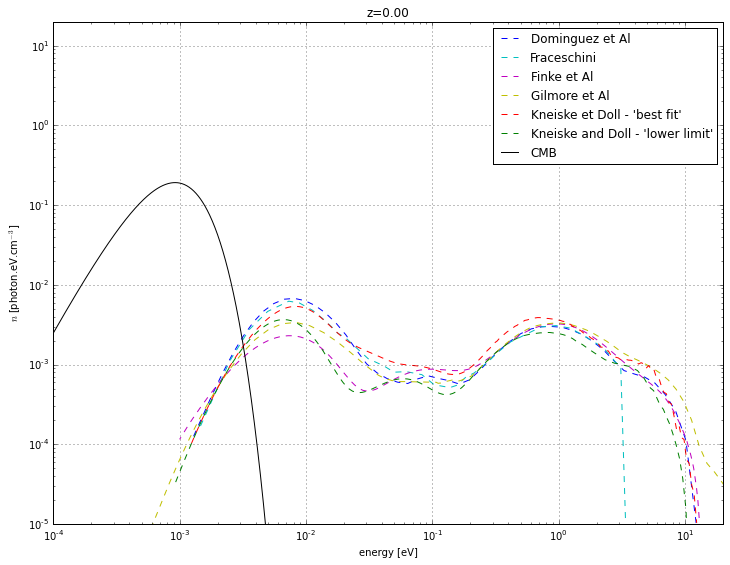

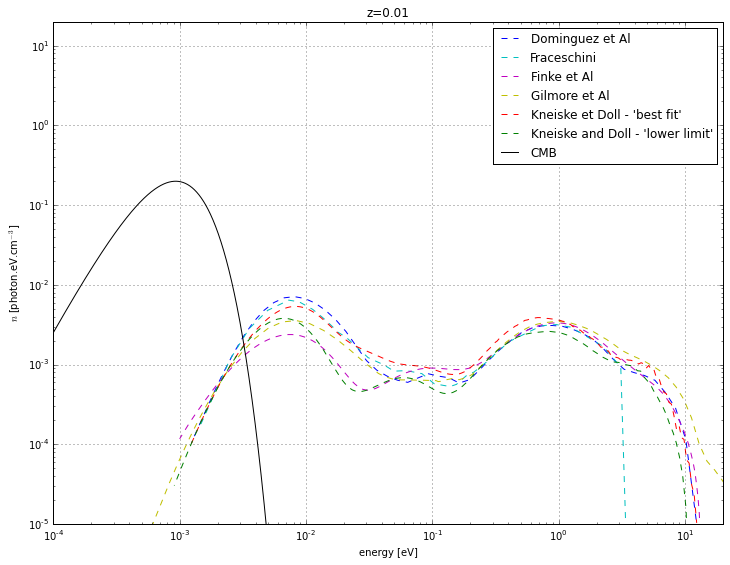

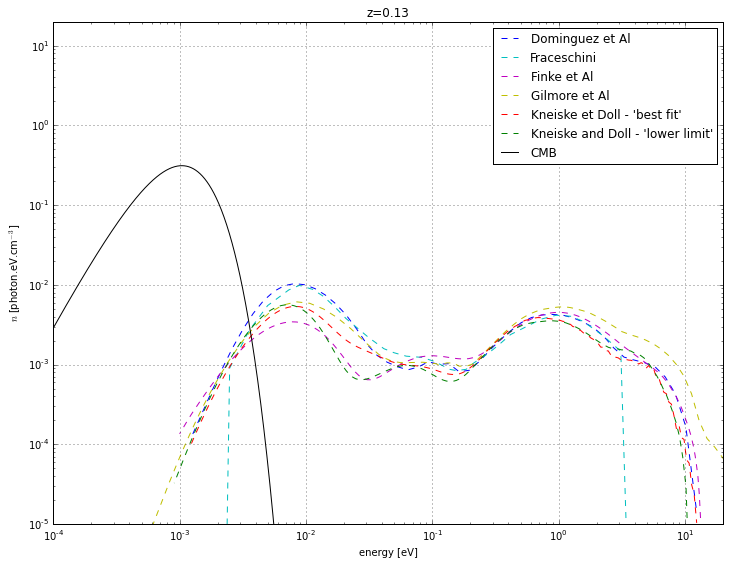

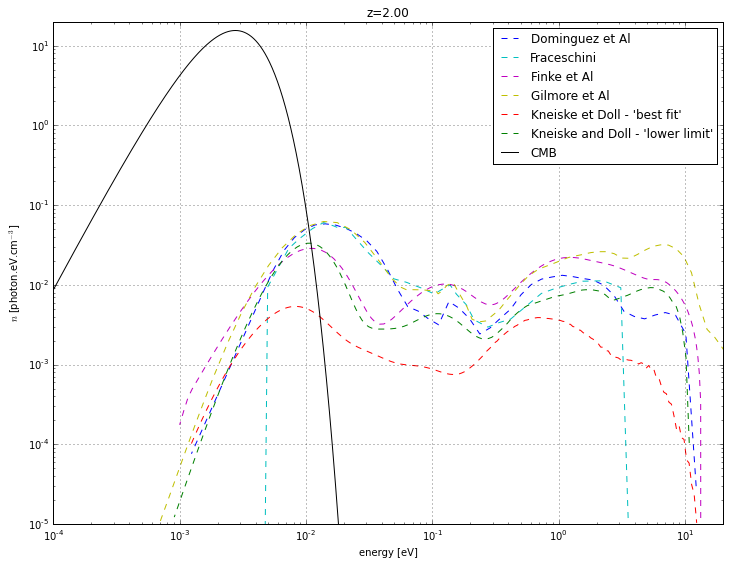

In [1]:
%matplotlib inline
from numpy import loadtxt, size, pi, exp, logspace
from  matplotlib.pyplot import figure, show
from modules.constants import *

def nCMB(E,z):
   kTcmb = k*Tcmb*erg_to_GeV*1e9*(1+z)
   return (hb*c*erg_to_GeV*1e9)**(-3) *(E/pi)**2 /(exp(E/kTcmb)-1)    

redshifts       =[0,0.01,0.13,2]
# always take line number (column 0 for h.nu)
ind_dominguez   =[1,3,5,15]     # see z_Dominguez.dat
ind_lower_limit =[1,54,108,179] # see z_IR.dat 
ind_franceschini=[1,1,2,11]     # step of 0.2 (11 redshifts)
ind_finke       =[1,2,14,201]   # step of 0.01 (500 redshifts)
ind_gilmore     =[1,3,6,14]     # see z_IR_gil.dat 

figs = [figure(figsize=(12,9)),figure(figsize=(12,9)),figure(figsize=(12,9)),figure(figsize=(12,9))]

i=0
for z in redshifts:
    ax = figs[i].add_subplot(111)
    
    # ==== Dominguez ====
    lamb,lambdaI = loadtxt("EBL_files/lambdaI_Dominguez.dat",unpack=True,usecols=[0,ind_dominguez[i]])
    hv = h*c/(lamb*1e-4)  # erg
    density = 1e-6*(4*pi/c)*lambdaI/(hv**2) /(erg_to_GeV*1e9) *(1+z)**3
    hv = hv *(erg_to_GeV*1e9)
    ax.plot(hv,density*hv**2,"--b",label="Dominguez et Al")

    # ==== Fransceschini ====
    hv,density = loadtxt("EBL_files/n_Fra.dat",unpack=True,usecols=[0,ind_franceschini[i]])
    ax.plot(hv,density*(1+z)**3*hv**2,"--c",label="Fraceschini")

    # ==== Finke ====
    hv,density = loadtxt("EBL_files/n_Finke.dat",unpack=True,usecols=[0,ind_finke[i]])
    ax.plot(hv,density*(1+z)**3*hv**2,"--m",label="Finke et Al")

    # ==== Gilmore ====
    hv,density = loadtxt("EBL_files/n_Gil.dat",unpack=True,usecols=[0,ind_gilmore[i]])
    ax.plot(hv,density*hv**2,"--y",label="Gilmore et Al")
      
    # ==== Kneiske and Doll - "best fit" ====
    hv,density = loadtxt("EBL_files/n_bestfit10.dat",unpack=True,usecols=[0,1])
    ax.plot(hv,density*hv**2,"--r",label="Kneiske et Doll - 'best fit'")

    # ==== Kneiske and Doll - "lower limit" ====
    hv,density = loadtxt("EBL_files/n_lowerlimit10.dat",unpack=True,usecols=[0,ind_lower_limit[i]])
    ax.plot(hv,density*(1+z)**3*hv**2,"--g",label="Kneiske and Doll - 'lower limit'")

    #==== CMB ====
    hv = logspace(-4,-1,1000)
    ax.plot(hv,nCMB(hv,z)*hv**2,"-k",label="CMB")

    ax.set_title("z=%.2f"%z)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([1e-4,20])
    ax.set_ylim([1e-5,20])
    ax.grid(b=True,which='major')
    ax.legend(loc="best")#,frameon=False,framealpha=0.5)
    ax.set_xlabel("energy [eV]")
    ax.set_ylabel("$n$ [photon.eV.cm$^{-3}$]")
    
    i+=1

show()

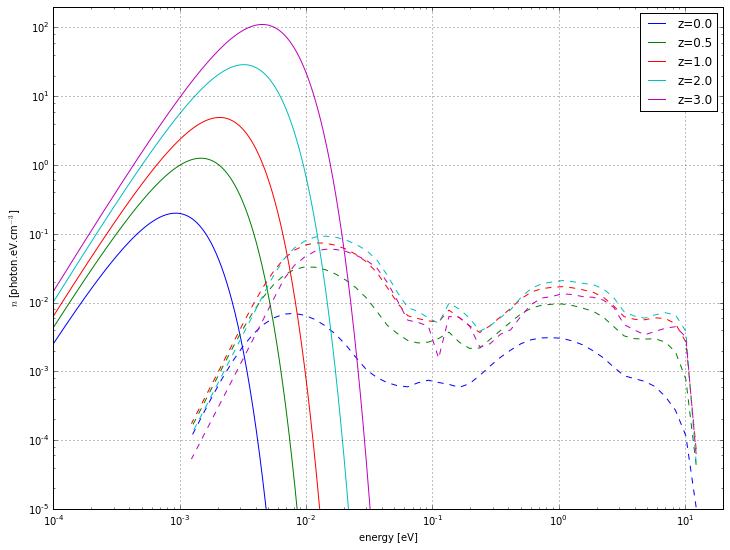

In [4]:
#==== Dominguez vs redshift ==================================================================
fig2 = figure(figsize=(12,9))
ax2 = fig2.add_subplot(111)

z = loadtxt("EBL_files/z_Dominguez.dat",unpack=True,usecols=[0])
for z_index in [1,9,12,15,17]:
   lamb,lambdaI = loadtxt("EBL_files/lambdaI_Dominguez.dat",unpack=True,usecols=[0,z_index])
   hv = h*c/(lamb*1e-4)  # erg
   density = 1e-6*(4*pi/c)*lambdaI/(hv**2) /(erg_to_GeV*1e9) *(1+z[z_index])**3
   hv = hv *(erg_to_GeV*1e9)
   p=ax2.plot(hv,density*hv**2,"--")
   # CMB
   hv = logspace(-4,-1,1000)
   ax2.plot(hv,nCMB(hv,z[z_index])*hv**2,color=p[0].get_color(),linestyle='-',label="z="+str(z[z_index-1]))

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([1e-4,20])
ax2.set_ylim([1e-5,2e2])
ax2.grid(b=True,which='major')
ax2.legend(loc="best")#,frameon=False,framealpha=0.5)
ax2.set_xlabel("energy [eV]")
ax2.set_ylabel("$n$ [photon.eV.cm$^{-3}$]")

show()

## Test EBL photon drawing in the simulation

## Distance of absorption ($\lambda_{\gamma\gamma}$)

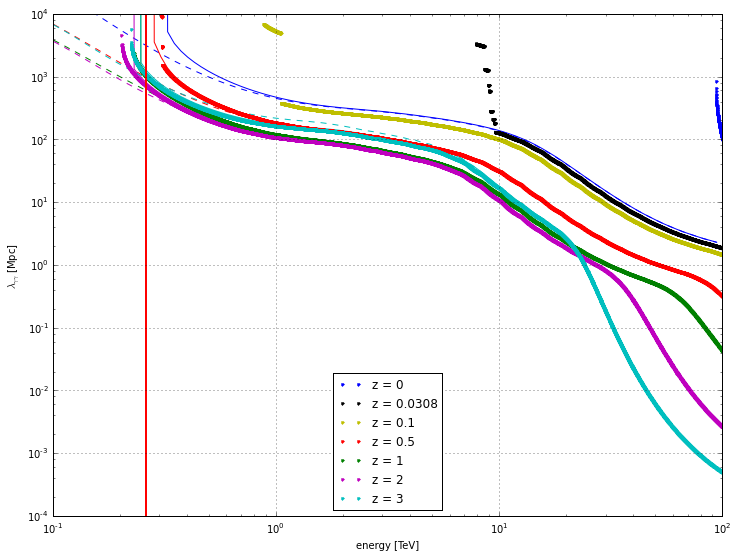

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
from numpy import *
from scipy.integrate import quad
from modules.analytic import Ethreshold_gg

c=2.99792458e10 # cm.s-1
Mpc=(3.0856776e+16)*1e8 # Mpc to cm
H0=67.8*1e5/(Mpc) # s-1
omegaM = 0.3
omegaK = 0
omegaL = 0.7
zlim=-0.
def properIntegrand(z):
   return -c/(H0*(1+z)*sqrt(omegaM*(1+z)**3+omegaK*(1+z)**2+omegaL))
def comobileIntegrand(z):
   return -c/(H0*sqrt(omegaM*(1+z)**3+omegaK*(1+z)**2+omegaL))

color=['b','r','g','m','c','y']

# Proper distance figure
#========================
fig1 = plt.figure(figsize=(12,9))
ax11 = fig1.add_subplot(111)

labels=["0","0.5","1","2","3"]
theory=[1,2,3,4,5]
ind=0
for lab in labels:
   # theoritical curve ===================================================
   # f: without cosmo
   # g: with cosmo
   e,f,g=loadtxt('Results/lambda_e.dat',unpack=True,usecols=[0,int(theory[ind]),int(theory[ind])+5])
   e = e*511.e3/1.e9 #GeV
   cond= (e>100) & (e<1e5)
   e=e[cond]
   g=g[cond]
   f=f[cond]
   p = ax11.plot(e*1e-3,g,"-"+color[ind]) 
   ax11.plot(e*1e-3,f,color=p[0].get_color(),linestyle='--')

   ind=ind+1

color=['b','k','y','r','g','m','c']
labels=["0","0.0308","0.1","0.5","1","2","3"]
ind=1
for lab in labels:
   e,f=loadtxt('Results/lambda_gg.dat',unpack=True,usecols=[0,ind])
   p = ax11.plot(e,f,"."+color[ind-1],label="z = "+lab) 
   ind=ind+1       
 
ax11.axvline(x=Ethreshold_gg()*1e-3, ymin=0., ymax = 1., color='r', linewidth=2)

ax11.legend(loc="best")
ax11.grid(b=True,which='major')
ax11.set_ylim([1e-4,1e4])
ax11.set_xscale('log')
ax11.set_yscale('log')
ax11.set_xlabel("energy [TeV]")
ax11.set_ylabel("$\lambda_{\gamma\gamma}$ [Mpc]")

plt.show()

## Cut-off energy ($E_{cut}$)

* minimal energy of absorption 
* all photons with energy higher than $E_{cut}$ is absorbed

53.8997808 0.00105543638532
3.15336 0.0604278771782
0.3438592 0.413918898649


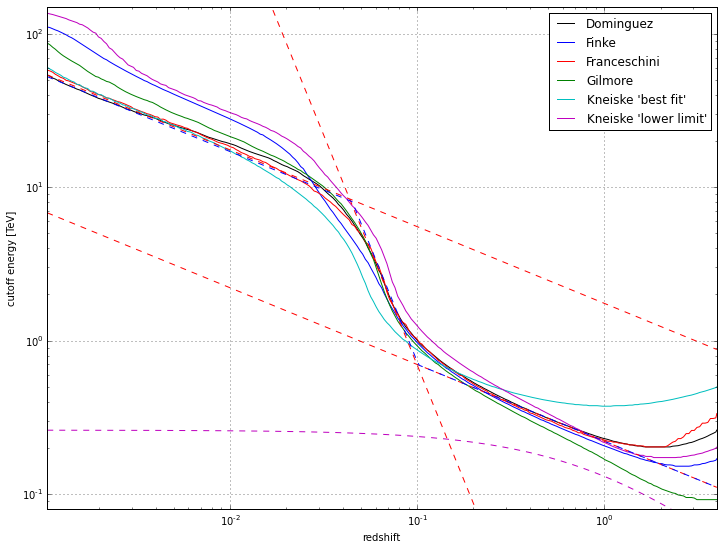

In [3]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import loadtxt, size
from numpy.random import normal
from scipy.optimize import curve_fit
from modules.analytic import Ethreshold_gg, Ecut

def E_cut(z,E0,z0,alpha):
    print E0, z0
    return E0*(z/z0)**alpha# TeV

fig = figure(figsize=(12,9))   
ax1 = fig.add_subplot(111)

zi,best_fit,dominguez,finke,franceschini,gilmore,lower_limit = loadtxt("Results/Ecut.dat",unpack=True,usecols=[0,1,2,3,4,5,6])

# lisser les courbes => moyenne des points par N
N=4
z=zi[::N]/N
b=best_fit[::N]/N
d=dominguez[::N]/N
f1=finke[::N]/N
f2=franceschini[::N]/N
g=gilmore[::N]/N
l=lower_limit[::N]/N
for i in range(1,N):
   z=z+zi[i::N]/N
   b=b+best_fit[i::N]/N
   d=d+dominguez[i::N]/N
   f1=f1+finke[i::N]/N
   f2=f2+franceschini[::N]/N
   g=g+gilmore[i::N]/N
   l=l+lower_limit[i::N]/N

ax1.plot(z,d, drawstyle='-',color='k',label="Dominguez")
ax1.plot(z,f1,drawstyle='-',color='b',label="Finke")
ax1.plot(z,f2,drawstyle='-',color='r',label="Franceschini")
ax1.plot(z,g, drawstyle='-',color='g',label="Gilmore")
ax1.plot(z,b, drawstyle='-',color='c',label="Kneiske 'best fit'")
ax1.plot(z,l, drawstyle='-',color='m',label="Kneiske 'lower limit'")

ax1.plot(z,E_cut(z,d[0],z[0],-0.5),"r--")
ax1.plot(z,E_cut(z,d[122],z[122],-3),"r--")
ax1.plot(z,E_cut(z,d[180],z[180],-0.5),"r--")

ax1.plot(z,Ecut(z),"b--")

ax1.plot(z,Ethreshold_gg(1)/(1+z)*1e-3,"m--")

#z_tab, E_save = loadtxt("Results/e_absorb.dat",unpack=True,usecols=[0,2])
#ax1.plot(z_tab,E_save,linestyle='--',color='k',label="Renaud")

ax1.legend(loc="best")
ax1.set_xscale('log')   
ax1.set_yscale('log')
ax1.set_xlim([min(z),max(z)])
ax1.set_ylim([0.08,150])
ax1.grid(b=True,which='major')
ax1.set_xlabel("redshift")
ax1.set_ylabel("cutoff energy [TeV]")
show()

* analytic approximations obtained from graph above
$$E_{cut}(z) \simeq 54 \left(\frac{z}{10^{-3}}\right)^{-0.5} \textrm{ TeV}$$ 

$$E_{cut}(z) \simeq 3.4 \left(\frac{z}{0.06}\right)^{-3} \textrm{ TeV}$$ 

$$E_{cut}(z) \simeq 0.35 \left(\frac{z}{0.4}\right)^{-0.5} \textrm{ TeV}$$ 
* divergence at low redshift seems strange

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: overflow encountered in exp


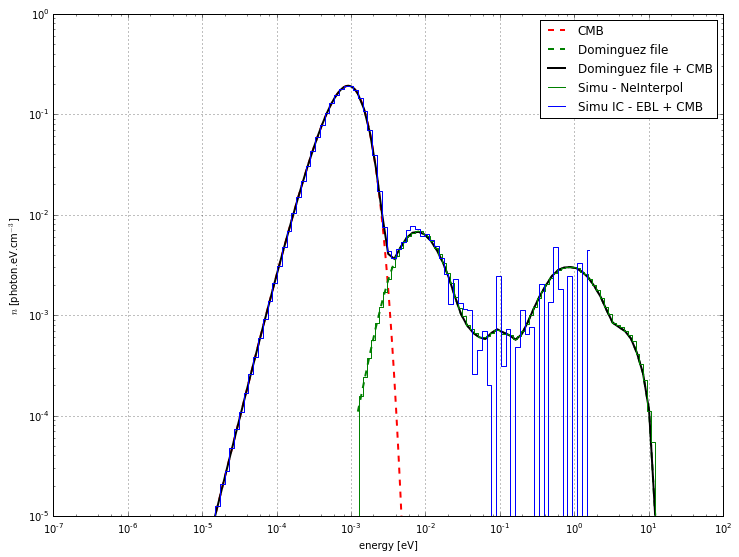

In [4]:
%matplotlib inline
from numpy import loadtxt, size, logspace, log10, histogram, exp, append
from  matplotlib.pyplot import figure, show
from modules.constants import *

def nCMB(E,z):
   kTcmb = k*Tcmb*erg_to_GeV*1e9*(1+z)
   return (hb*c*erg_to_GeV*1e9)**(-3) *(E/pi)**2 /(exp(E/kTcmb)-1)     

ax = figure(figsize=(12,9)).add_subplot(111)

E = logspace(-5,-2,100)
p=ax.plot(E,nCMB(E,0)*E**2,"--",color="r",linewidth=2,label="CMB")

z = loadtxt("EBL_files/z_Dominguez.dat",unpack=True,usecols=[0])
lamb,lambdaI = loadtxt("EBL_files/lambdaI_Dominguez.dat",unpack=True,usecols=[0,1])
hv = h*c/(lamb*1e-4)  # erg
density = 1e-6*(4*pi/c)*lambdaI/(hv**2) /(erg_to_GeV*1e9) *(1+z[0])**3
hv = hv[::-1] *(erg_to_GeV*1e9)
p=ax.plot(hv,density[::-1]*hv**2,"--",linewidth=2,color="g",label="Dominguez file")
max_Dom = max(density[::-1]*hv**2)

E = logspace(-5,log10(min(hv)),100)
ntot = append(nCMB(E,0)*E**2,density[::-1]*hv**2 + nCMB(hv,0)*hv**2)
E = append(E,hv)
p=ax.plot(E,ntot,"-",color="k",linewidth=2,label="Dominguez file + CMB")

# x est la grille de mon histogram
# y1 est mon propre histogramme
# y2 est la table de Dominguez interpolee
x,y1,y2 = loadtxt('Results/EBL_test.dat',unpack=True)
ax.plot(x,x*x*y2*max_Dom/max(y1*x**2),drawstyle='steps-mid',color='g',label='Simu - NeInterpol')
#ax.plot(x,x*x*y1*max_Dom/max(y1*x**2),drawstyle='steps-mid',color='r',label='Simu IC - EBL only')

# Partir de toutes les energies tirees, je construis un nouvel histogram avec python
#ee = loadtxt('Results/EBL_test.txt',unpack=True)
#hist,xbin = histogram(ee*511.e3,bins=x,density=True)
#hist = hist/max(hist) *max_Dom
#xx  = x[0:len(x)-1]
#ax.plot(xx,xx*xx*hist*max_Dom/max(hist*xx**2),drawstyle='steps-mid',color='r',label='Histo python')

nbBins = 99
#z,Esimu = loadtxt("Results/EBL_test.dat",unpack=True)
#bins=logspace(log10(min(Esimu)),log10(max(Esimu)),nbBins+1)
#N,Eebl=histogram(Esimu,bins,density=True)
#E=(Eebl[1:nbBins+1]*Eebl[0:nbBins])**0.5
#ax.plot(E,N*E**2*max_Dom/max(N*E**2),drawstyle='steps-mid',color='r',label='Simu - EBL only')

max_Dom = max(ntot)
z,Esimu = loadtxt("Results/EBL_CMB_test.dat",unpack=True)
bins=logspace(log10(min(Esimu)),log10(max(Esimu)),nbBins+1)
N,Eebl=histogram(Esimu,bins,density=True)
E=(Eebl[1:nbBins+1]*Eebl[0:nbBins])**0.5
ax.plot(E,N*E**2*max_Dom/max(N*E**2),drawstyle='steps-mid',color='b',label='Simu IC - EBL + CMB')

#nbBins = 99
#z,Esimu = loadtxt("Results/EBL_test-ter.dat",unpack=True)
#bins=logspace(log10(min(Esimu)),log10(max(Esimu)),nbBins+1)
#N,Eebl=histogram(Esimu,bins,density=True)
#E=(Eebl[1:nbBins+1]*Eebl[0:nbBins])**0.5
#ax.plot(E,N*E**2*max_Dom/max(N*E**2),drawstyle='steps-mid',color='b',label='Numpy histo 2')

ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(b=True,which='major')
ax.legend(loc="best")#,frameon=False,framealpha=0.5)
ax.set_xlabel("energy [eV]")
#ax.set_xlim([1e-4,20])
ax.set_ylim([1e-5,1])
ax.set_ylabel("$n$ [photon.eV.cm$^{-3}$]")

show()

## Target photons energy versus gamma-rays energy

3.8678424795 0.115220741159 -0.9


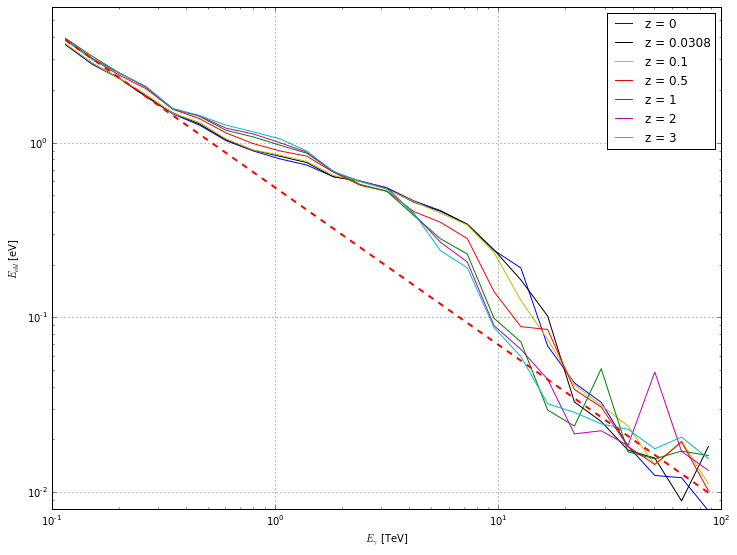

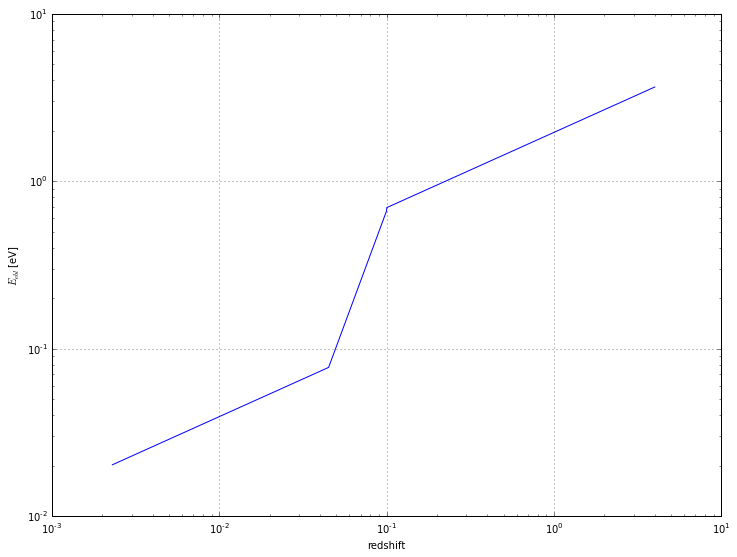

In [31]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import arange

def Eebl(Egamma,Eebl0,E0,alpha):
   print Eebl0, E0, alpha 
   return Eebl0*(Egamma/E0)**alpha
 
fig1 = figure(figsize=(12,9))
ax11 = fig1.add_subplot(111)

# pour moyenner sur N points!
N=400

color=['b','k','y','r','g','m','c']
labels=["0","0.0308","0.1","0.5","1","2","3"]
ind=1
for lab in labels:
   e,f=loadtxt('Results/Eebl.dat',unpack=True,usecols=[0,ind])
   em=e[::N]/N
   fm=f[::N]/N
   for i in range(1,N):
      em=em+e[i::N]/N
      fm=fm+f[i::N]/N
   p = ax11.plot(em,fm,color[ind-1],label="z = "+lab) 
   ind=ind+1       

ax11.plot(em,Eebl(em,fm[0],em[0],-0.9),"r--",linewidth=2)

ax11.legend(loc="best")
ax11.grid(b=True,which='major')
ax11.set_ylim([8e-3,6])
ax11.set_xscale('log')
ax11.set_yscale('log')
ax11.set_xlabel("$E_\gamma$ [TeV]")
ax11.set_ylabel("$E_{ebl}$ [eV]")

nz = 5000
zmin = 2.3e-3
zmax = 4.
z = zmin*(zmax/zmin)**(arange(nz)/(nz-1.))

fig = figure(figsize=(12,9))   
ax = fig.add_subplot(111)

ax.plot(z,Etarget(Ecut(z)))

ax.grid(b=True,which='major')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("redshift")
ax.set_ylabel("$E_{ebl}$ [eV]")

show()


* Target photon energy does not depends on the redshift
* Analytic approximation:
$$ E_{ebl} \simeq 3.9 \left(\frac{E_\gamma}{0.1\textrm{TeV}}\right)^{-0.9} \textrm{ eV}$$
* At high energy (>10TeV), which corresponds to the $E_{cut}$ at low redshift, $E_{ebl}<0.1$eV
* This $E_{ebl}$ corresond to the first peak of the EBL , but the density given by the models could change with a factor 4 on this peak 
* This explains the differences observed